In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sc

# Data collection and processing

In [2]:
#Import Dataset
heart_data = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\heart_attack_prediction_dataset.csv")

In [3]:
heart_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
#To check total number of rows and columns in our dataset
heart_data.shape

(8763, 26)

In [5]:
#To check whether the dataset has null values or not
heart_data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
#To check the datatype of each column
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
heart_data = heart_data.drop('Patient ID', axis = 1) #This column is outlier and we dont need it 

In [8]:
heart_data['BP_systolic'] = heart_data['Blood Pressure'].apply(lambda x: x.split("/")[0])
heart_data['BP_diastolic'] = heart_data['Blood Pressure'].apply(lambda x: x.split("/")[1]) 


heart_data = heart_data.drop(columns=['Blood Pressure']) #The Blood pressure column has relevance to heart attack risk but we need to change it to numerical feature

In [9]:
heart_data.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere                          object
Heart Attac

In [10]:
heart_data['BP_systolic'] = pd.to_numeric(heart_data['BP_systolic'])
heart_data['BP_diastolic'] = pd.to_numeric(heart_data['BP_diastolic']) #change it to numerical value

In [11]:
heart_data['Diet']= heart_data['Diet'].replace({'Healthy': 0, 'Unhealthy': 1, 'Average': 2})
heart_data['Sex'] = heart_data['Sex'].replace({'Male': 0, 'Female': 1, 'Other': 2, 'Unknown': 3}) #change these categorial value to numerical 

In [12]:
heart_data.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere                          object
Heart Attac

In [13]:
heart_data['Heart Attack Risk'].value_counts() #check the count of target value

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

1-- represent defective heart 0-- represent healthy heart 

In [16]:
heart_data22.describe()  #To generate a summary of descriptive statistics for the numerical columns of dataset

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.302636,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,0.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


## Statistical summary of the numerical features

Age: Ranges from 18 to 90, with an average of 54 years.

Sex: mean of around 0.30, meaning approximately 30% of the dataset are females (represented by 1) and 70% are males (represented by 0).

Cholesterol: Mean is 259 mg/dL, indicating generally high cholesterol levels.

Heart Rate: Average of 75 bpm, with a reasonable range (40–110 bpm).

Diabetes, Family History, Smoking, Obesity: Binary indicators (0 or 1).

BMI: Mean of ~29 indicates the population is close to the obesity threshold.

Triglycerides: The average value is 417.68, with a range from 30 to 800.

Sleep Hours Per Day: The average is around 7 hours, which is typical for most people.

BP_systolic: Ranges from 90 to 180 mm Hg, with an average of around 135 mm Hg.

BP_diastolic: Ranges from 60 to 110 mm Hg, with an average of around 85 mm Hg.

# Key Insights:
    
Health Indicators:

The population shows a mean BMI of 28.89, close to obesity thresholds.

Cholesterol and triglycerides have high average values, indicating a health risk.

Lifestyle Factors:

Exercise: Average of 10 hours per week.
    
Sedentary hours and physical activity suggest a moderately active lifestyle.

Heart Attack Risk: Calculated on a 0–1 scale (mean: 0.36), indicating a generally low-risk population.

In [15]:
heart_data22 = heart_data.copy()
heart_data22.head() #copy the dataset

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [17]:
heart_data22 = heart_data22.drop('Country',axis = 1)
heart_data22 =heart_data22.drop('Continent',axis = 1)
heart_data22 =heart_data22.drop('Hemisphere',axis = 1)
#remove irrelevant columns

In [18]:
heart_data22 =heart_data22.drop('Income',axis = 1) 

In [19]:
heart_data22.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,21.809144,231,1,5,0,91,88


# EXPLORATORY DATA ANALYSIS

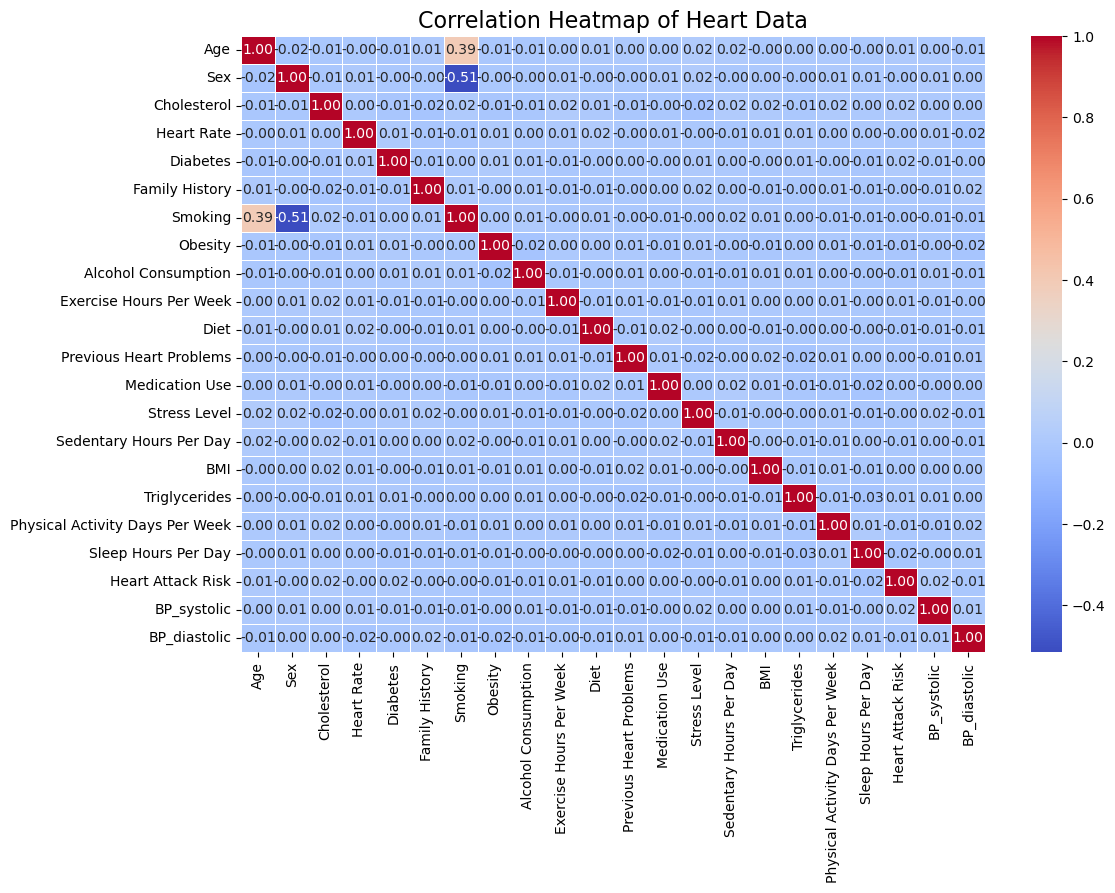

In [20]:
corr_matrix = heart_data22.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Heart Data', fontsize=16)
plt.show()
#To visually understand the relationships between multiple variables

# Distribution: HISTOGRAM

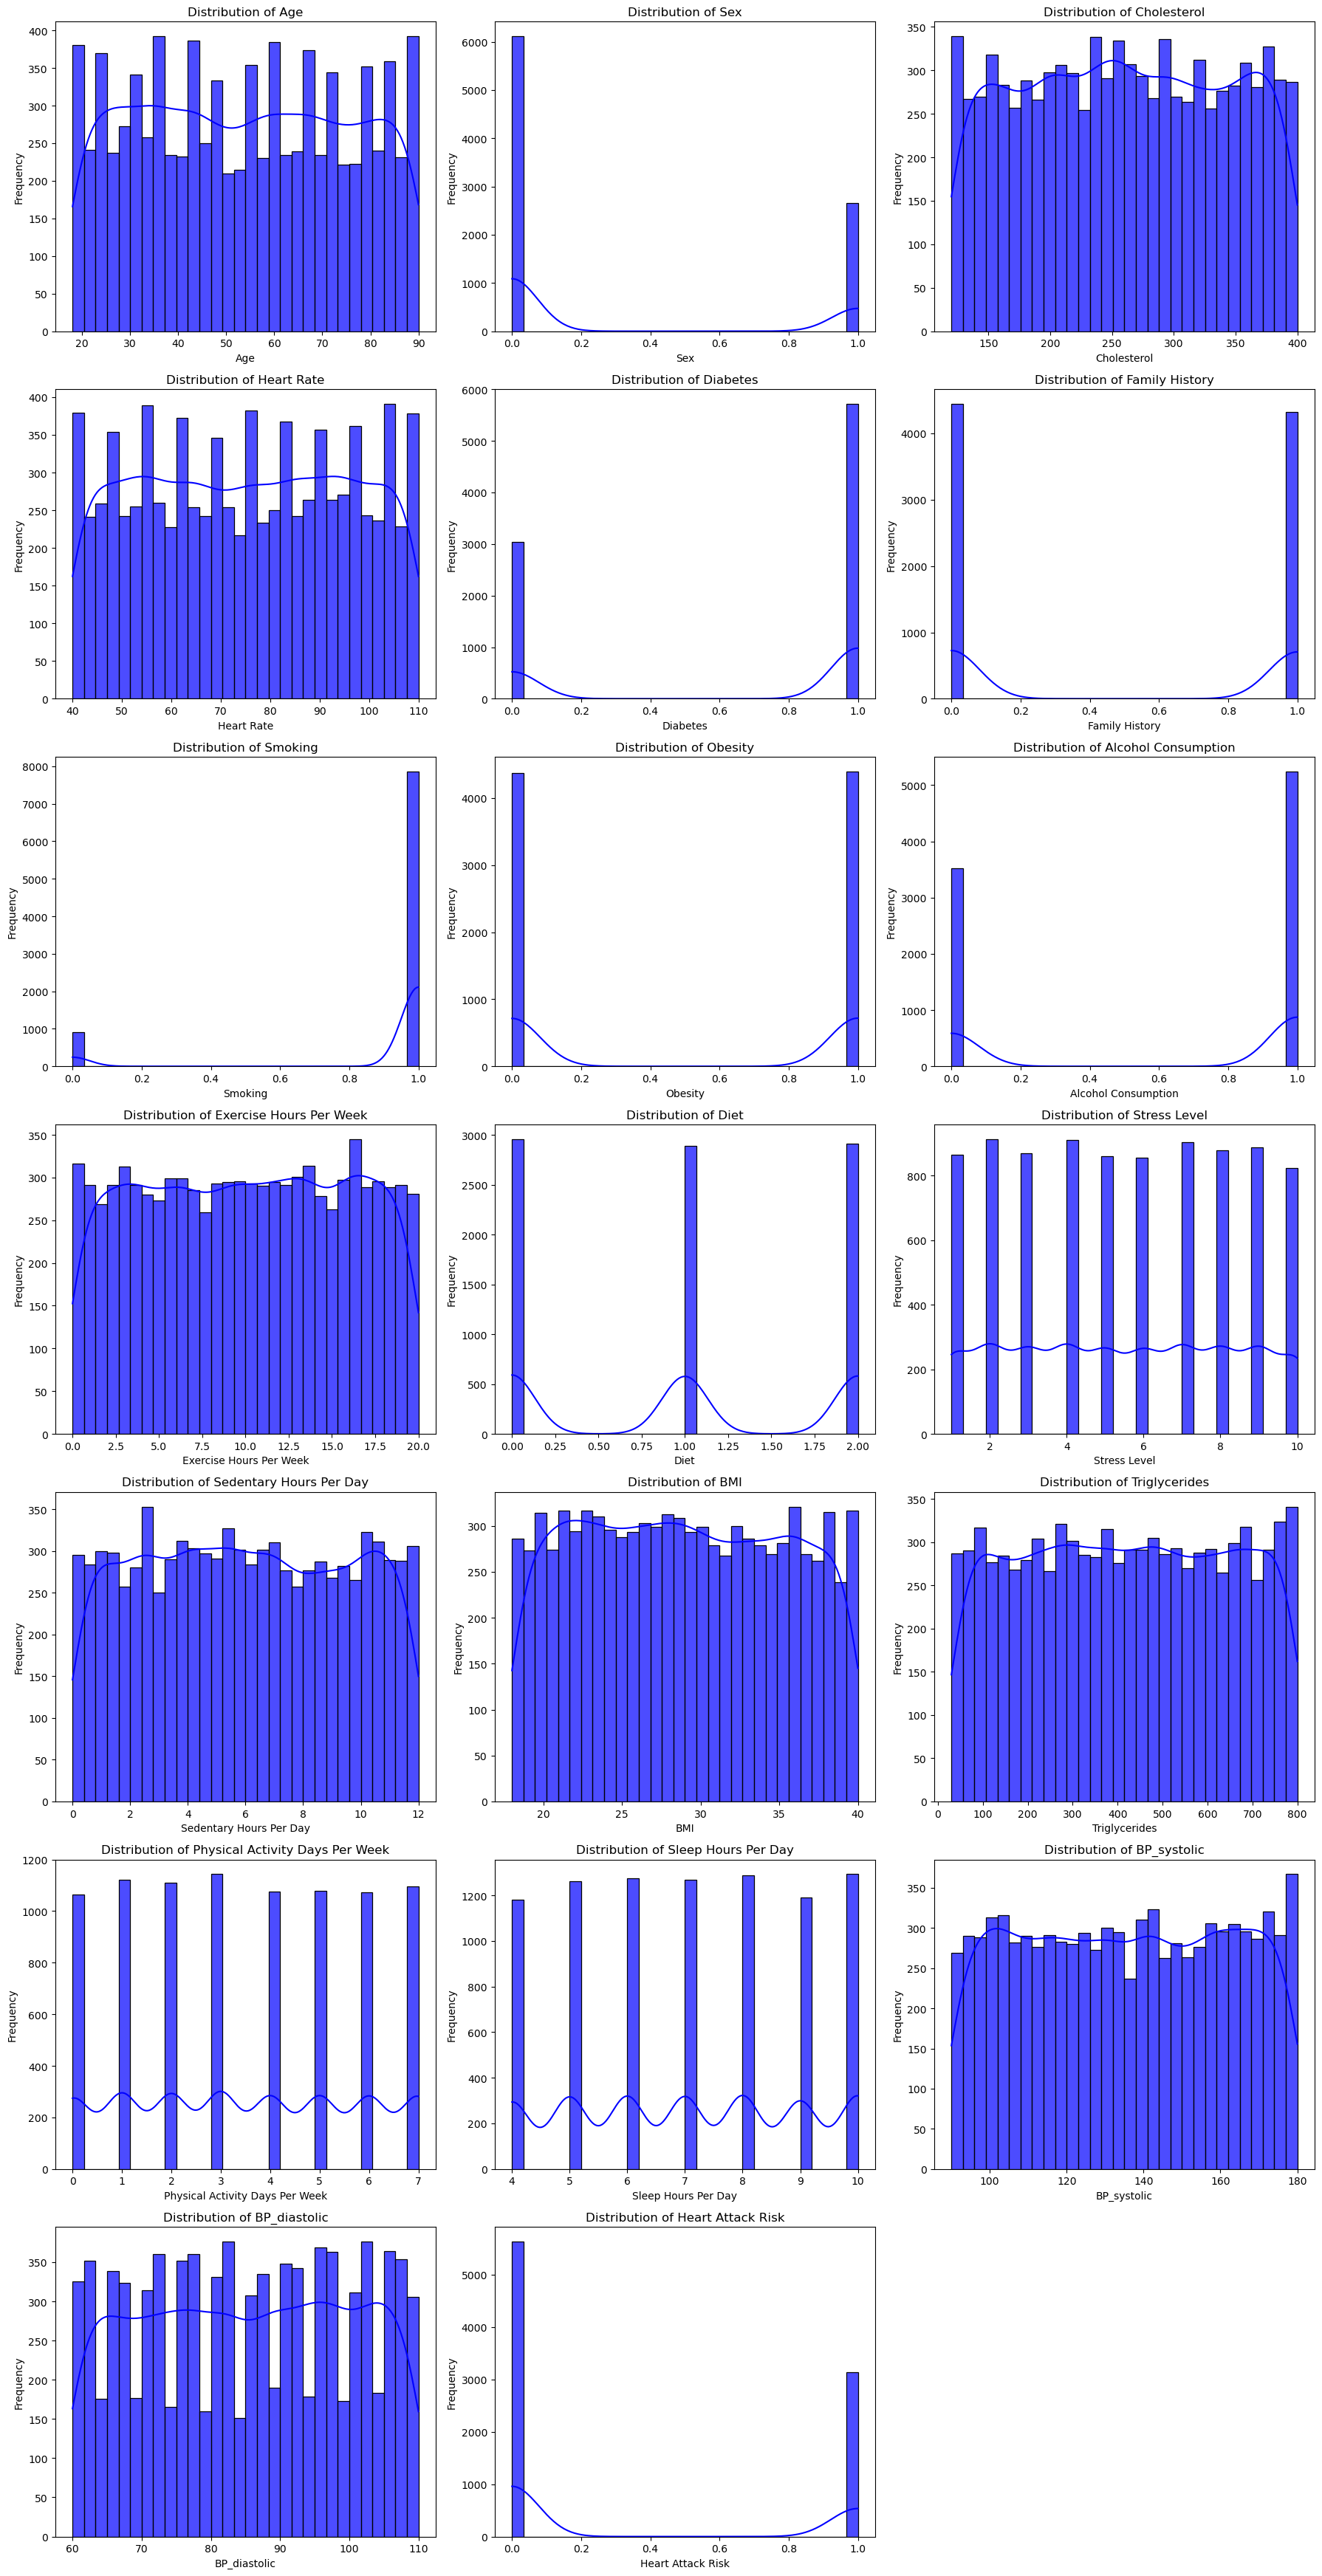

In [21]:
continuous_vars = ['Age','Sex', 'Cholesterol', 'Heart Rate','Diabetes','Family History','Smoking','Obesity',
                   'Alcohol Consumption','Exercise Hours Per Week', 'Diet','Stress Level', 'Sedentary Hours Per Day', 'BMI', 
    'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day','BP_systolic','BP_diastolic',
                   'Heart Attack Risk']

num_vars = len(continuous_vars)
cols = 3 
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(18, rows * 5))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(heart_data[var], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Age: The age of the individual in years. This variable can affect heart disease risk, with older age groups generally having a higher risk.

Sex: The gender of the individual, represented as a binary value (e.g., 0 for male and 1 for female). Gender can influence heart disease risk.

Cholesterol: The cholesterol level in the blood, typically measured in mg/dL. High cholesterol is a significant risk factor for heart disease.

Heart Rate: The number of heartbeats per minute (bpm). A higher resting heart rate may be associated with increased risk for heart disease.

Diabetes: Whether the individual has diabetes (1) or not (0). Diabetes is a significant risk factor for heart disease.

Family History: Whether there is a family history of heart disease (1) or not (0). A family history of heart disease increases the risk for an individual.

Smoking: Whether the individual smokes (1) or not (0). Smoking is a major contributor to heart disease risk.

Obesity: Whether the individual is obese (1) or not (0). Obesity is a known risk factor for heart disease.

Alcohol Consumption: Whether the individual consumes alcohol (1) or not (0). Excessive alcohol consumption increases heart disease risk.

Exercise Hours Per Week: The number of hours per week the individual spends exercising. Regular physical activity can lower the risk of heart disease.

Diet: Whether the individual follows a specific diet (1) or not (0). A healthy diet can contribute to reducing heart disease risk.

Stress Level: A measure of the individual's stress levels, typically rated on a scale (e.g., 1–10). Chronic stress can increase the risk of heart disease.

Sedentary Hours Per Day: The number of hours per day the individual spends being sedentary (e.g., sitting or lying down). Prolonged sedentary behavior can increase the risk of heart disease.

BMI (Body Mass Index): A measure of body fat based on height and weight. A high BMI is often associated with higher risk for heart disease.

Triglycerides: A type of fat found in the blood, often measured in mg/dL. Elevated triglyceride levels are a risk factor for heart disease.

Physical Activity Days Per Week: The number of days per week the individual engages in physical activity. More active days are generally associated with lower heart disease risk.

Sleep Hours Per Day: The average number of hours the individual sleeps per day. Poor sleep patterns can increase the risk for cardiovascular disease.

BP_systolic (Systolic Blood Pressure): The top number in a blood pressure reading, which measures the pressure in the arteries when the heart beats. High systolic blood pressure can increase the risk of heart disease.

BP_diastolic (Diastolic Blood Pressure): The bottom number in a blood pressure reading, which measures the pressure in the arteries when the heart rests between beats. High diastolic blood pressure can also increase heart disease risk.

Heart Attack Risk: The target variable, representing the likelihood of an individual having a heart attack, often categorized as 0 (no risk) or 1 (high risk).

# Analyze data with Graphs

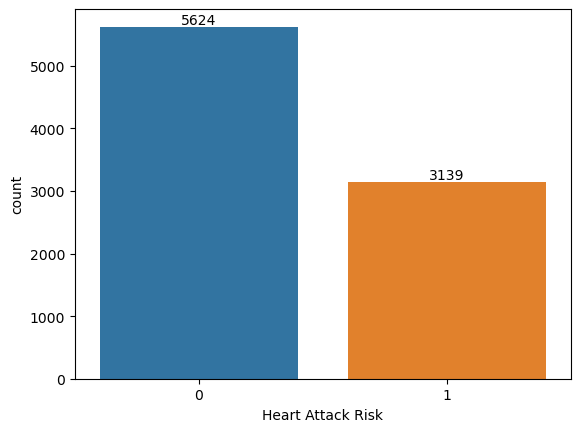

In [22]:
ax = sns.countplot(x='Heart Attack Risk',data = heart_data)

for bars in ax.containers:
    ax.bar_label(bars)  #In whole dataset how many people are prone to heart disease

In [27]:
heart_data['Age Group'] = pd.cut(heart_data['Age'], bins=[0, 18, 35, 50, 65, 100], 
                                 labels=['<18', '18-35', '36-50', '51-65', '65+'])

print(heart_data[['Age', 'Age Group']].head())
#group the age gap 

   Age Age Group
0   67       65+
1   21     18-35
2   21     18-35
3   84       65+
4   66       65+


In [28]:
heart_data.groupby(['Age Group'], as_index=False)['Heart Attack Risk'].sum().sort_values(by='Heart Attack Risk',ascending=False)
# which age group more prone to heart diasese

,Age Group,Heart Attack Risk
4,65+,1083
1,18-35,749
2,36-50,671
3,51-65,595
0,<18,41


<Axes: xlabel='Heart Attack Risk', ylabel='Age Group'>

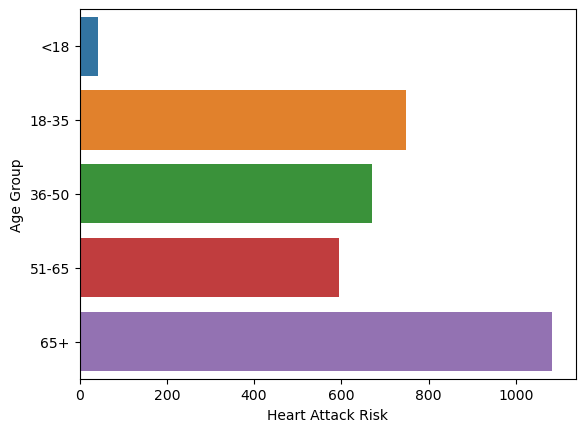

In [29]:
risk_gen = heart_data.groupby(['Age Group'], as_index=False)['Heart Attack Risk'].sum().sort_values(by='Heart Attack Risk',ascending=False)
sns.barplot(x='Heart Attack Risk', y= 'Age Group',data = risk_gen)
#show it in graph

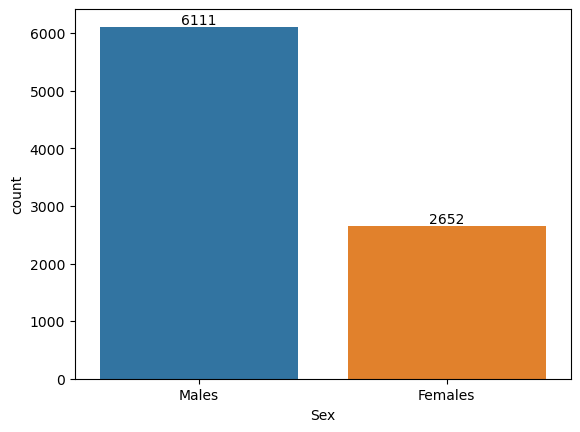

In [36]:
ax = sns.countplot(x='Sex',data = heart_data)
plt.xticks([0,1],['Males','Females'])

for bars in ax.containers:
    ax.bar_label(bars)
    
#How many male and female are in our dataset

In [37]:
heart_data.groupby(['Sex'], as_index=False)['Heart Attack Risk'].sum().sort_values(by='Heart Attack Risk',ascending=False)
#out of total how many male and female are prone to heart disease

,Sex,Heart Attack Risk
0,0,2195
1,1,944


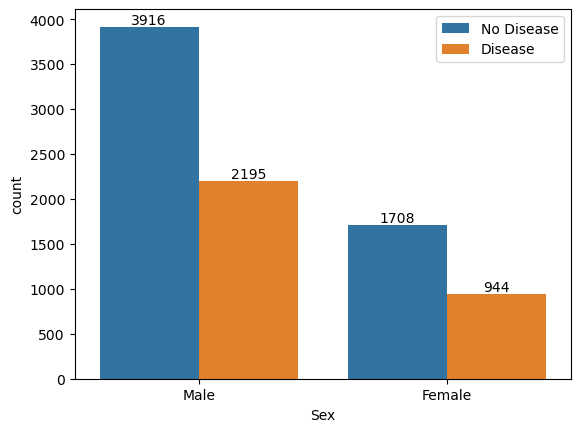

In [38]:
ax = sns.countplot(data = heart_data, x= heart_data['Sex'], hue = heart_data['Heart Attack Risk'])
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['No Disease', 'Disease'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show() # 1 disease(Blue) and 0 non-disease(orange)

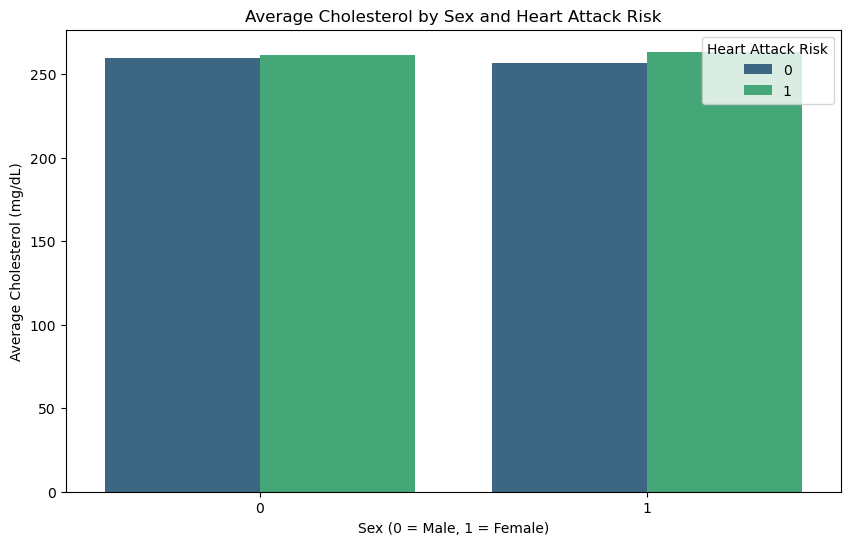

In [22]:
# Group data by Sex and Heart Attack Risk
grouped_data = heart_data22.groupby(["Sex", "Heart Attack Risk"])["Cholesterol"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data, 
    x="Sex", 
    y="Cholesterol", 
    hue="Heart Attack Risk", 
    palette="viridis"
)

plt.title("Average Cholesterol by Sex and Heart Attack Risk")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Average Cholesterol (mg/dL)")
plt.legend(title="Heart Attack Risk")
plt.show()


In [223]:
heart_data.groupby(['Sex'], as_index=False)['Smoking'].sum().sort_values(by='Smoking',ascending=False)
# how many male and female smokes

,Sex,Smoking
0,0,6111
1,1,1748


In [220]:
heart_data.groupby(['Sex', 'Smoking'], as_index=False)['Heart Attack Risk'].sum()
# How many smokers are prone to disease

,Sex,Smoking,Heart Attack Risk
0,0,1,2195
1,1,0,329
2,1,1,615


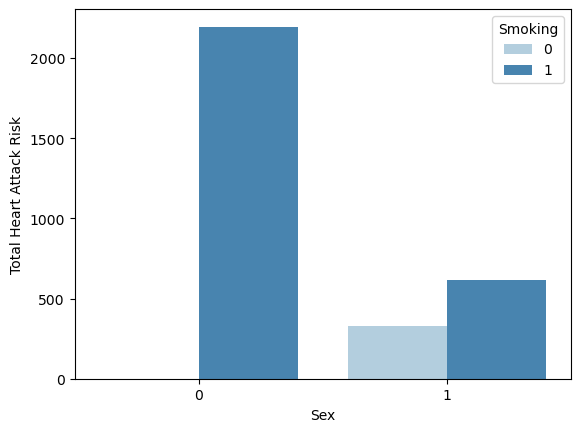

In [228]:
combined_risk = heart_data.groupby(['Sex', 'Smoking'], as_index=False)['Heart Attack Risk'].sum()

sns.barplot(x='Sex', y='Heart Attack Risk', hue='Smoking', data=combined_risk, palette='Blues')

plt.xlabel('Sex')
plt.ylabel('Total Heart Attack Risk')
plt.legend(title='Smoking', loc='upper right')
plt.show()        #1 smokers and 0 non- smokers

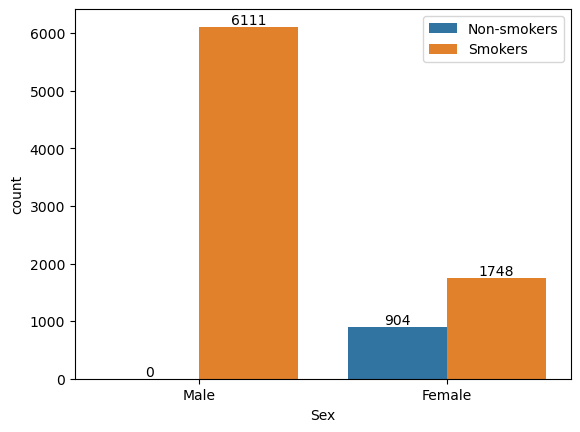

In [39]:
az = sns.countplot(data = heart_data, x= heart_data['Sex'], hue= heart_data['Smoking'])
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['Non-smokers', 'Smokers'])
for bars in az.containers:
    az.bar_label(bars)
plt.show()

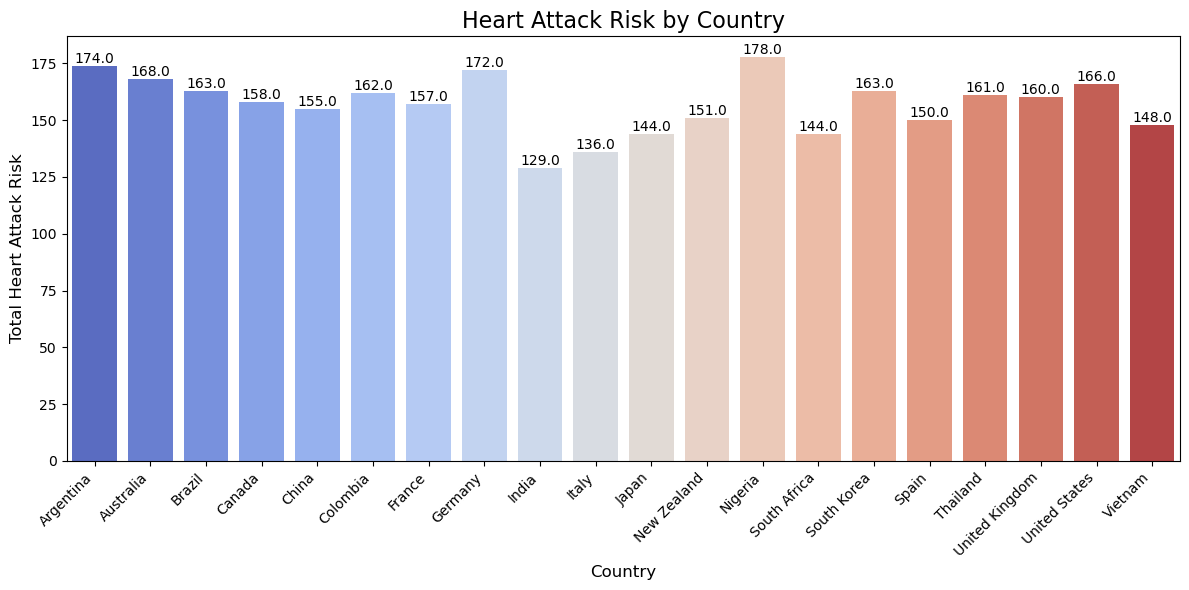

In [8]:
# Group data by Country and compute the total Heart Attack Risk
country_risk = heart_data.groupby('Country', as_index=False)['Heart Attack Risk'].sum()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Heart Attack Risk', data=country_risk, palette='coolwarm')

# Add titles and labels
plt.title('Heart Attack Risk by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Heart Attack Risk', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
heart_data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'BP_systolic',
       'BP_diastolic'],
      dtype='object')

In [40]:
heart_data.groupby(['Sex'], as_index=False)['Obesity'].sum().sort_values(by='Obesity',ascending=False)

,Sex,Obesity
0,0,3069
1,1,1325


In [41]:
heart_data.groupby(['Sex', 'Obesity'], as_index=False)['Heart Attack Risk'].sum()

,Sex,Obesity,Heart Attack Risk
0,0,0,1097
1,0,1,1098
2,1,0,496
3,1,1,448


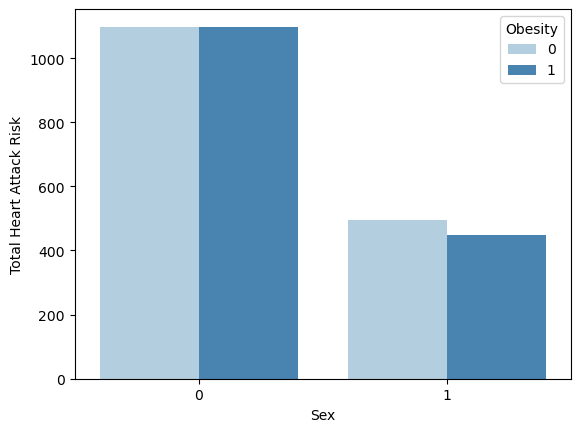

In [42]:
combined_risk = heart_data.groupby(['Sex', 'Obesity'], as_index=False)['Heart Attack Risk'].sum()

sns.barplot(x='Sex', y='Heart Attack Risk', hue='Obesity', data=combined_risk, palette='Blues')

plt.xlabel('Sex')
plt.ylabel('Total Heart Attack Risk')
plt.legend(title='Obesity', loc='upper right')
plt.show()
# 0 - Non-obesed and 1 obesed

# import liabrary for modeling


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [19]:
!pip show scikit-learn
!pip show imbalanced-learn

Name: scikit-learn
Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIB

In [4]:
!pip install --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/a2/cbfb5743de748d574ffdfd557e9cb29ba4f8b8a3e07836c6c176f713de2f/scikit_learn-1.6.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.0-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-win_amd64.whl (11.1 MB)


In [10]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.6.0


In [11]:
!pip install imbalanced-learn xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.5/124.9 MB 3.7 MB/s eta 0:00:35
   ---------------------------------------- 0.9/124.9 MB 4.5 MB/s eta 0:00:28
   ---------------------------------------- 1.0/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.2/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.2/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.2/124.9 MB 4.4 MB/s eta 0:00:29
   ------------------------

# SPLIT FEATURES AND TARGETS

In [24]:
X = heart_data22[['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use',
        'BMI', 'Triglycerides',
       'Sleep Hours Per Day',
       'Sex', 'Diet']]
Y = heart_data22['Heart Attack Risk']


# Rescaling values

In [26]:
#the target variable has a significant imbalance so we are using smote here
smote = SMOTE(random_state = 50)
X_resample, Y_resample = smote.fit_resample(X, Y)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [28]:
# to save an object, in this case, a scaler, to a file on disk, so that it can be loaded and reused later without needing to recalculate or redefine the scaling process.

from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [29]:
#the transformed (scaled) feature

X_scaled

array([[ 0.64137251, -0.64768514,  0.88273692, ..., -0.47557351,
        -0.58528955,  1.35642541],
       [-1.55351263,  1.59790396,  1.15189225, ...,  0.04468041,
        -0.58528955,  0.10327773],
       [-1.55351263,  0.79147693,  1.49794911, ..., -1.51608135,
         1.70855605, -1.14986995],
       ...,
       [-0.79007432,  1.31255286, -0.84754736, ..., -0.99582743,
        -0.58528955, -1.14986995],
       [ 0.25965336, -1.19357421, -0.3092367 , ...,  0.56493433,
        -0.58528955,  0.10327773],
       [ 0.92766188, -0.16382893,  0.42132778, ...,  0.04468041,
        -0.58528955, -1.14986995]])

In [30]:
#splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split \
(X_scaled, Y_resample, test_size=0.33, random_state=42)

In [31]:
X_train.shape

(7536, 18)

In [32]:
X_test.shape

(3712, 18)

In [33]:
#to reshape the target arrays into 1 -Dimensional array
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

# Modeling Approach and Comparison

In [30]:
#compare the models performance
classi = [
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['Support Vector Machines', SVC()],
    ['RandomForestClassifier', RandomForestClassifier \
     (random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')],
    ['GradientBoostingClassifier', GradientBoostingClassifier()],
    ['AdaBoostClassifier', AdaBoostClassifier()],
    ['ExtraTreesClassifier', ExtraTreesClassifier()],
    ['K-Nearest Neighbors', KNeighborsClassifier()],
    ['XGBClassifier', XGBClassifier()]

]

In [31]:
result1 = []
results2 = []

In [32]:
for model in classi:
    name = model[0]
    mod = model[1]
    
    mod.fit(X_train, Y_train)
    Y_pred = mod.predict(X_test)
    
    #Errors Metrics
    mse = metrics.mean_squared_error(Y_pred,Y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(Y_pred,Y_test)
    
    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    acctrs = mod.score(X_train, Y_train)
    acctes = mod.score(X_test, Y_test)
    
    result1.append({'Model': name, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    results2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})
    
result1_heart_data = pd.DataFrame(result1)
results2_heart_data = pd.DataFrame(results2)

In [33]:
result1_heart_data.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.331088,1.000000,0.668912
5,ExtraTreesClassifier,0.348060,1.000000,0.651940
7,XGBClassifier,0.362877,0.978370,0.637123
3,GradientBoostingClassifier,0.363147,0.693471,0.636853
1,Support Vector Machines,0.364763,0.728105,0.635237
4,AdaBoostClassifier,0.379041,0.629114,0.620959
6,K-Nearest Neighbors,0.390356,0.755971,0.609644
0,DecisionTreeClassifier,0.418103,1.000000,0.581897


In [34]:
results2_heart_data

,Model,MeanSqauredError,RootMeanSquareError,MeanAbsoluteError
0,DecisionTreeClassifier,0.418103,0.646609,0.418103
1,Support Vector Machines,0.364763,0.603956,0.364763
2,RandomForestClassifier,0.331088,0.575403,0.331088
3,GradientBoostingClassifier,0.363147,0.602616,0.363147
4,AdaBoostClassifier,0.379041,0.615663,0.379041
5,ExtraTreesClassifier,0.348060,0.589966,0.348060
6,K-Nearest Neighbors,0.390356,0.624784,0.390356
7,XGBClassifier,0.362877,0.602393,0.362877


# Classification Report of all the model

In [63]:
for key in classi:
    name = key[0]
    mod = key[1]
    mod.fit(X_train, Y_train)
    predictions = mod.predict(X_test)
    acc = accuracy_score(predictions, Y_test)
    precision = precision_score(predictions, Y_test)
    recall = recall_score(predictions, Y_test)
    Y_predict = mod.predict(X_test)
    auc = roc_auc_score(Y_test, Y_test)
    print('Classification Report:',name)
    print(classification_report(Y_test,predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(Y_test, predictions))

Classification Report: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1857
           1       0.58      0.59      0.58      1855

    accuracy                           0.58      3712
   macro avg       0.58      0.58      0.58      3712
weighted avg       0.58      0.58      0.58      3712

ROC_AUC_SCORE is 0.5824384168883817
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.61      0.73      0.67      1857
           1       0.67      0.54      0.60      1855

    accuracy                           0.63      3712
   macro avg       0.64      0.63      0.63      3712
weighted avg       0.64      0.63      0.63      3712

ROC_AUC_SCORE is 0.6346467870532857
Classification Report: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1857
           1       0.69   

# MODELING

## RandomForest Classifier

In [50]:
model = RandomForestClassifier \
(random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')


In [51]:
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300,
                       random_state=42)

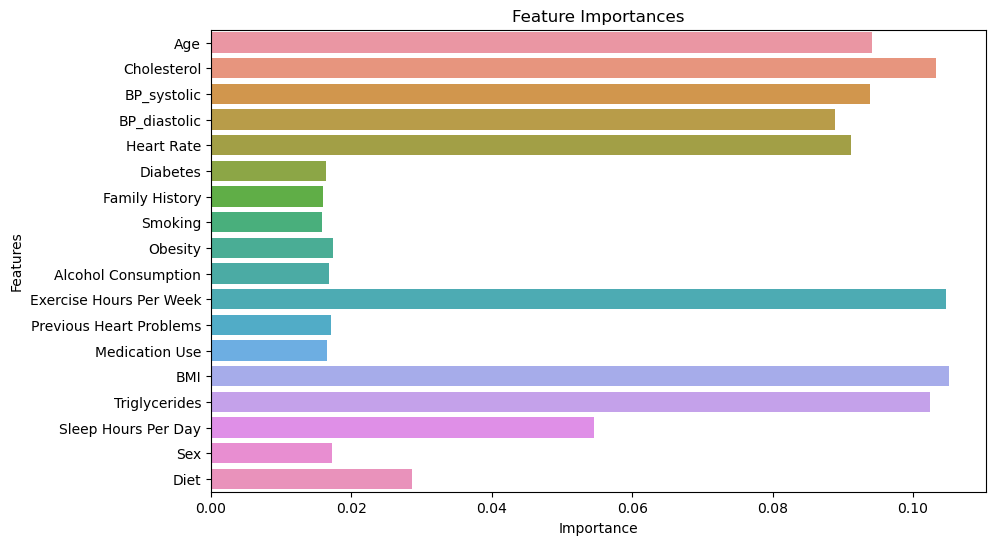

In [43]:
# Assuming 'model' is already trained (e.g., a RandomForestClassifier )
feature_importances = model.feature_importances_

# Feature names (ensure these match the model's input features)
feature_names = ['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate', 
                 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
                 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 
                 'BMI', 'Triglycerides', 'Sleep Hours Per Day', 'Sex', 'Diet']  

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Random Forest Classifier

In [35]:
print(X_train.shape)
print(Y_train.shape)


(7536, 18)
(7536,)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [38]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=3)


In [39]:
random_search.fit(X_train, Y_train)
print("Best Hyperparameters: ", random_search.best_params_)


Best Hyperparameters:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [46]:
# Train the model using the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=150,
    min_samples_split=2,
    min_samples_leaf=2,
    max_depth=None,
    random_state=42
)

# Fit the model
best_model.fit(X_train, Y_train)

# Evaluate on training and testing data
train_Y_pred = best_model.predict(X_train)
test_Y_pred = best_model.predict(X_test)

# Evaluate the model with various metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training accuracy
train_accuracy = accuracy_score(Y_train, train_Y_pred)
print("Training Accuracy: ", train_accuracy)

# Testing accuracy
test_accuracy = accuracy_score(Y_test, test_Y_pred)
print("Testing Accuracy: ", test_accuracy)

# Classification report
print("\nClassification Report (Test Data):")
print(classification_report(Y_test, test_Y_pred))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, test_Y_pred))


Training Accuracy:  0.9990711252653928
Testing Accuracy:  0.6694504310344828

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1857
           1       0.71      0.58      0.64      1855

    accuracy                           0.67      3712
   macro avg       0.67      0.67      0.67      3712
weighted avg       0.67      0.67      0.67      3712


Confusion Matrix (Test Data):
[[1408  449]
 [ 778 1077]]


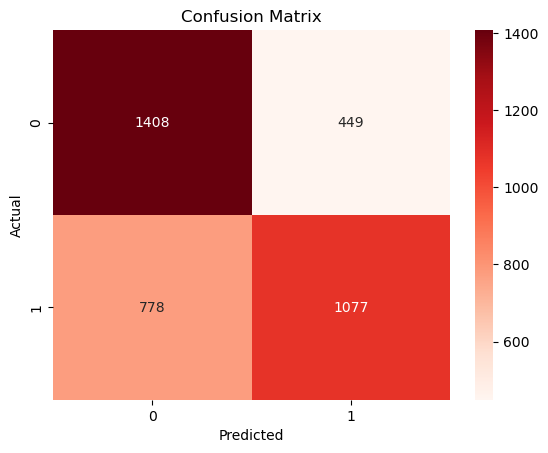

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_Y_pred is the predicted values on the test set
con_mat = confusion_matrix(Y_test, test_Y_pred)

# Create heatmap for confusion matrix
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Lifestyle Recommendation Based on Risk Prediction

In [57]:
def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

In [58]:
def determine_lifestyle_changes(predict_type, dictionary):
    lifestyle_changes = []  # List to store recommended lifestyle changes

    # Check if the predicted risk indicates a higher likelihood of heart attack (greater than 0)
    if predict_type > 0:
        # Check conditions for different lifestyle recommendations based on the individual's health data
        if 'Smoking' in new_person and new_person['Smoking'] == 1:
            lifestyle_changes.append('quit smoking')  # Suggest quitting smoking if the person smokes
        if 'BMI' in new_person and new_person['BMI'] < 18.5:
            lifestyle_changes.append('gain weight')  # Suggest gaining weight if BMI is too low
        elif 'BMI' in new_person and new_person['BMI'] > 25:
            lifestyle_changes.append('lose weight')  # Suggest losing weight if BMI is too high
        if 'Exercise Hours Per Week' in new_person and new_person['Exercise Hours Per Week'] < 1.25:
            lifestyle_changes.append('do more exercise')  # Suggest exercising more if the person does not exercise enough
        if 'Diet' in new_person and new_person['Diet'] == 0:
            lifestyle_changes.append('eat healthy food')  # Suggest improving diet if the diet is unhealthy
        if 'Alcohol Consumption' in new_person and new_person['Alcohol Consumption'] == 1:
            lifestyle_changes.append('try reducing alcohol')  # Suggest reducing alcohol intake if the person consumes alcohol

        # Print the recommended lifestyle changes
        print("Heart attack risk:", predict_type)
        for i in lifestyle_changes:
            print(f"Please {i},")
        print("This can reduce your heart attack risk.")
        
    # If the predicted risk is extremely high, advise immediate consultation with a doctor
    if predict_type > 0.75:
        print("You should consult a doctor immediately.")
        print("Heart attack risk:", predict_type)

In [73]:
new_person = {'Age': 21, 'Cholesterol': 124, 'BP_systolic': 120, 'BP_diastolic': 80, 'Heart Rate': 72,
       'Diabetes': 0, 'Family History': 0, 'Smoking': 1, 'Obesity': 0,
       'Alcohol Consumption':0, 'Exercise Hours Per Week': 2.07,
       'Previous Heart Problems':0, 'Medication Use':0,
        'BMI': 18.5, 'Triglycerides': 132
       , 'Sleep Hours Per Day' : 4,
       'Sex': 0, 'Diet': 1}
dict1 = pd.DataFrame([new_person])
x = dicti_vals(new_person)
x

array([[ 21.  , 124.  , 120.  ,  80.  ,  72.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   2.07,   0.  ,   0.  ,  18.5 , 132.  ,   4.  ,
          0.  ,   1.  ]])

In [60]:
#Use the trained model to predict the heart attack risk for the new individual
model.predict(x)


array([0], dtype=int64)

In [74]:
#predict the heart attack risk and provide tailored recommendations
predict_type = model.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

Heart attack risk: [0.41333333]
Please quit smoking,
This can reduce your heart attack risk.


In [58]:
import pickle

# Save the model to a pickle file
with open('heart_attack_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'heart_attack_model.pkl'")


Model saved as 'heart_attack_model.pkl'


In [59]:
# Load the saved model
with open('heart_attack_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")


Model loaded successfully
